In [1]:
from alphatools.research import run_pipeline, make_factor_plot
from alphatools.expression import ExpressionAlpha
from alphatools.ics import Sector
from alphatools.ics import SubIndustry as Industry
from zipline.pipeline.factors import AverageDollarVolume, Returns
from zipline.pipeline import Pipeline
from zipline.pipeline.data import USEquityPricing as USEP

from IPython.display import Image

<string>:307: UserWarning: Overwriting bundle with name 'futures'


In [2]:
universe = AverageDollarVolume(window_length=120).top(2000)

In [3]:
expressions = {
    1: '(rank(ts_argmax(signedpower(((returns < 0) ? stddev(returns, 20) : close), 2.), 5)) - 0.5)',
    2: '(-1 * correlation(rank(delta(log(volume), 2)), rank(((close - opens) / opens)), 6))',
    3: '(-1 * correlation(rank(opens), rank(volume), 10))',
    4: '(-1 * ts_rank(rank(low), 9))',
    5: '(rank((opens - (sum(vwap, 10) / 10))) * (-1 * abs(rank((close - vwap)))))',
    6: '(-1 * correlation(opens, volume, 10))',
    7: '((adv20 < volume) ? ((-1 * ts_rank(abs(delta(close, 7)), 60)) * sign(delta(close, 7))) : (-1* 1))',
    8:  '-1*rank(((sum(opens, 5)*sum(returns, 5))-delay((sum(opens, 5)*sum(returns, 5)),10)))',
    9: '((0 < ts_min(delta(close, 1), 5)) ? delta(close, 1) : ((ts_max(delta(close, 1), 5) < 0) ? delta(close, 1) : (-1 * delta(close, 1))))',
    10: 'rank(((0 < ts_min(delta(close, 1), 4)) ? delta(close, 1) : ((ts_max(delta(close, 1), 4) < 0) ? delta(close, 1) : (-1 * delta(close, 1)))))',
    11: '((rank(ts_max((vwap - close), 3)) + rank(ts_min((vwap - close), 3))) * rank(delta(volume, 3)))',
    12: '(sign(delta(volume, 1)) * (-1 * delta(close, 1)))',
    13: '(-1 * rank(covariance(rank(close), rank(volume), 5)))',
    14: '((-1 * rank(delta(returns, 3))) * correlation(opens, volume, 10))',
    15: '(-1 * sum(rank(correlation(rank(high), rank(volume), 3)), 3))',
    16: '(-1 * rank(covariance(rank(high), rank(volume), 5)))',
    17: '(((-1 * rank(ts_rank(close, 10))) * rank(delta(delta(close, 1), 1))) *rank(ts_rank((volume / adv20), 5)))',
    18: '(-1 * rank(((stddev(abs((close - opens)), 5) + (close - opens)) + correlation(close, opens,10))))',
    19: '((-1 * sign(((close - delay(close, 7)) + delta(close, 7)))) * (1 + rank((1 + sum(returns, 250)))))',
    20: '(((-1 * rank((opens - delay(high, 1)))) * rank((opens - delay(close, 1)))) * rank((opens - delay(low, 1))))',
    21: '((((sum(close, 8) / 8) + stddev(close, 8)) < (sum(close, 2) / 2)) ? (-1 * 1) : (((sum(close, 2) / 2) < ((sum(close, 8) / 8) - stddev(close, 8))) ? 1 : (((1 < (volume / adv20)) || ((volume/adv20) == 1)) ? 1 : (-1 * 1))))',
    22: '(-1 * (delta(correlation(high, volume, 5), 5) * rank(stddev(close, 20))))',
    23: '(((sum(high, 20) / 20) < high) ? (-1 * delta(high, 2)) : 0)',
    24: '((((delta((sum(close, 100) / 100), 100) / delay(close, 100)) < 0.05) || ((delta((sum(close, 100) / 100), 100) / delay(close, 100)) == 0.05)) ? (-1 * (close - ts_min(close, 100))) : (-1 * delta(close, 3)))',
    25: 'rank(((((-1 * returns) * adv20) * vwap) * (high - close)))',
    26: '(-1 * ts_max(correlation(ts_rank(volume, 5), ts_rank(high, 5), 5), 3))',
    27: '((0.5 < rank((sum(correlation(rank(volume), rank(vwap), 6), 2) / 2.0))) ? (-1 * 1) : 1)',
    28: 'scale(((correlation(adv20, low, 5) + ((high + low) / 2)) - close))',
    29: '(min(product(rank(rank(scale(log(sum(ts_min(rank(rank((-1 * rank(delta((close - 1),5))))), 2), 1))))), 1), 5) + ts_rank(delay((-1 * returns), 6), 5))',
    30: '(((1.0 - rank(((sign((close - delay(close, 1))) + sign((delay(close, 1) - delay(close, 2)))) + sign((delay(close, 2) - delay(close, 3)))))) * sum(volume, 5)) / sum(volume, 20))',
    31: '((rank(rank(rank(decay_linear((-1 * rank(rank(delta(close, 10)))), 10)))) + rank((-1 * delta(close, 3)))) + sign(scale(correlation(adv20, low, 12))))',
    32: '(scale(((sum(close, 7) / 7) - close)) + (20 * scale(correlation(vwap, delay(close, 5), 230))))',
    33: 'rank((-1 * ((1 - (opens / close))^1)))',
    34: 'rank(((1 - rank((stddev(returns, 2) / stddev(returns, 5)))) + (1 - rank(delta(close, 1)))))',
    35: '((ts_rank(volume, 32) * (1 - ts_rank(((close + high) - low), 16))) * (1 - ts_rank(returns, 32))) ',
    36: '(((((2.21 * rank(correlation((close - opens), delay(volume, 1), 15))) + (0.7 * rank((opens - close)))) + (0.73 * rank(ts_rank(delay((-1 * returns), 6), 5)))) + rank(abs(correlation(vwap, adv20, 6)))) + (0.6 * rank((((sum(close, 200) / 200) - opens) * (close - opens))))) ',
    37: '(rank(correlation(delay((opens - close), 1), close, 200)) + rank((opens - close))) ',
    38: '((-1 * rank(ts_rank(close, 10))) * rank((close / opens)))',
    39: '((-1 * rank((delta(close, 7) * (1 - rank(decay_linear((volume / adv20), 9)))))) * (1 + rank(sum(returns, 250))))',
    40: '((-1 * rank(stddev(high, 10))) * correlation(high, volume, 10))',
    41: '(((high * low)^0.5) - vwap) ',
    42: '(rank((vwap - close)) / rank((vwap + close)))',
    43: '(ts_rank((volume / adv20), 20) * ts_rank((-1 * delta(close, 7)), 8)) ',
    44: '(-1 * correlation(high, rank(volume), 5)) ',
    45: '(-1 * ((rank((sum(delay(close, 5), 20) / 20)) * correlation(close, volume, 2)) *rank(correlation(sum(close, 5), sum(close, 20), 2)))) ',
    46: '((0.25 < (((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10))) ? (-1 * 1) : (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < 0) ? 1 : ((-1 * 1) * (close - delay(close, 1))))) ',
    47: '((((rank((1 / close)) * volume) / adv20) * ((high * rank((high - close))) / (sum(high, 5) / 5))) - rank((vwap - delay(vwap, 5)))) ',
    48: '(indneutralize(((correlation(delta(close, 1), delta(delay(close, 1), 1), 250) * delta(close, 1)) / close), IndClass.subindustry) / sum(((delta(close, 1) / delay(close, 1))^2), 250)) ',
    49: '(((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 *0.1)) ? 1 : ((-1 * 1) * (close - delay(close, 1))))',
    50: '(-1 * ts_max(rank(correlation(rank(volume), rank(vwap), 5)), 5)) ',
    51: '(((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 *0.05)) ? 1 : ((-1 * 1) * (close - delay(close, 1)))) ',
    52: '((((-1 * ts_min(low, 5)) + delay(ts_min(low, 5), 5)) * rank(((sum(returns, 240) - sum(returns, 20)) / 220))) * ts_rank(volume, 5)) ',
    53: '(-1*delta((((close-low) - (high-close)) / (close-low)), 9))',
    54: '((-1 * ((low - close) * (opens^5))) / ((low - high) * (close^5)))',
    55: '(-1 * correlation(rank(((close - ts_min(low, 12)) / (ts_max(high, 12) - ts_min(low,12)))), rank(volume), 6))',
    56: '(0 - (1 * (rank((sum(returns, 10) / sum(sum(returns, 2), 3))) * rank((returns * cap)))))',
    57: '(0 - (1*((close - vwap)/decay_linear(rank(ts_argmax(close, 30)),2))))',
    58: '(-1 * ts_rank(decay_linear(correlation(indneutralize(vwap, IndClass.sector), volume,3.92795), 7.89291), 5.50322)) ',
    59: '(-1 * ts_rank(decay_linear(correlation(indneutralize(((vwap * 0.728317) + (vwap *(1 - 0.728317))), IndClass.industry), volume, 4.25197), 16.2289), 8.19648)) ',
    60: '(0 - (1 * ((2 * scale(rank(((((close - low) - (high - close)) / (high - low)) * volume)))) -scale(rank(ts_argmax(close, 10)))))) ',
    61: '(rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282))) ',
    62: '((rank(correlation(vwap, sum(adv20, 22.4101), 9.91009)) < rank(((rank(opens) + rank(opens)) < (rank(((high + low) / 2)) + rank(high))))) * -1) ',
    63: '((rank(decay_linear(delta(indneutralize(close, IndClass.industry), 2.25164), 8.22237)) - rank(decay_linear(correlation(((vwap * 0.318108) + (opens * (1 - 0.318108))), sum(adv180,37.2467), 13.557), 12.2883))) * -1) ',
    64: '((rank(correlation(sum(((opens * 0.178404) + (low * (1 - 0.178404))), 12.7054),sum(adv120, 12.7054), 16.6208)) < rank(delta(((((high + low) / 2) * 0.178404) + (vwap * (1 -0.178404))), 3.69741))) * -1) ',
    65: '((rank(correlation(((opens * 0.00817205) + (vwap * (1 - 0.00817205))), sum(adv60,8.6911), 6.40374)) < rank((opens - ts_min(opens, 13.635)))) * -1) ',
    66: '((rank(decay_linear(delta(vwap, 3.51013), 7.23052)) + ts_rank(decay_linear(((((low* 0.96633) + (low * (1 - 0.96633))) - vwap) / (opens - ((high + low) / 2))), 11.4157), 6.72611)) * -1) ',
    67: '((rank((high - ts_min(high, 2.14593)))^rank(correlation(indneutralize(vwap,IndClass.sector), indneutralize(adv20, IndClass.subindustry), 6.02936))) * -1) ',
    68: '((ts_rank(correlation(rank(high), rank(adv15), 8.91644), 13.9333) < rank(delta(((close * 0.518371) + (low * (1 - 0.518371))), 1.06157))) * -1) ', 
    69: '((rank(ts_max(delta(indneutralize(vwap, IndClass.industry), 2.72412),4.79344))^ts_rank(correlation(((close * 0.490655) + (vwap * (1 - 0.490655))), adv20, 4.92416),9.0615)) * -1) ',
    70: '((rank(delta(vwap, 1.29456))^ts_rank(correlation(indneutralize(close,IndClass.industry), adv50, 17.8256), 17.9171)) * -1) ',
    71: 'max(ts_rank(decay_linear(correlation(ts_rank(close, 3.43976), ts_rank(adv180,12.0647), 18.0175), 4.20501), 15.6948), ts_rank(decay_linear((rank(((low + opens) - (vwap + vwap)))^2), 16.4662), 4.4388))',
    72: '(rank(decay_linear(correlation(((high + low) / 2), adv40, 8.93345), 10.1519)) / rank(decay_linear(correlation(ts_rank(vwap, 3.72469), ts_rank(volume, 18.5188), 6.86671),2.95011))) ',
    73: '(max(rank(decay_linear(delta(vwap, 4.72775), 2.91864)), ts_rank(decay_linear(((delta(((opens * 0.147155) + (low * (1 - 0.147155))), 2.03608) / ((opens * 0.147155) + (low * (1 - 0.147155)))) * -1), 3.33829), 16.7411)) * -1) ',
    74: '((rank(correlation(close, sum(adv30, 37.4843), 15.1365)) <rank(correlation(rank(((high * 0.0261661) + (vwap * (1 - 0.0261661)))), rank(volume), 11.4791)))* -1) ',
    75: '(rank(correlation(vwap, volume, 4.24304)) < rank(correlation(rank(low), rank(adv50),12.4413)))',
    76: '(max(rank(decay_linear(delta(vwap, 1.24383), 11.8259)),ts_rank(decay_linear(ts_rank(correlation(indneutralize(low, IndClass.sector), adv81,8.14941), 19.569), 17.1543), 19.383)) * -1) ',
    77: 'min(rank(decay_linear(((((high + low) / 2) + high) - (vwap + high)), 20.0451)),rank(decay_linear(correlation(((high + low) / 2), adv40, 3.1614), 5.64125))) ',
    78: '(rank(correlation(sum(((low * 0.352233) + (vwap * (1 - 0.352233))), 19.7428),sum(adv40, 19.7428), 6.83313))^rank(correlation(rank(vwap), rank(volume), 5.77492))) ',
    79: '(rank(delta(indneutralize(((close * 0.60733) + (opens * (1 - 0.60733))),IndClass.sector), 1.23438)) < rank(correlation(ts_rank(vwap, 3.60973), ts_rank(adv150,9.18637), 14.6644))) ',
    80: '((rank(sign(delta(indneutralize(((opens * 0.868128) + (high * (1 - 0.868128))),IndClass.industry), 4.04545)))^ts_rank(correlation(high, adv10, 5.11456), 5.53756)) * -1) ',
    81: '((rank(log(product(rank((rank(correlation(vwap, sum(adv10, 49.6054),8.47743))^4)), 14.9655))) < rank(correlation(rank(vwap), rank(volume), 5.07914))) * -1) ',
    82: '(min(rank(decay_linear(delta(opens, 1.46063), 14.8717)),ts_rank(decay_linear(correlation(indneutralize(volume, IndClass.sector), ((opens * 0.634196) +(opens * (1 - 0.634196))), 17.4842), 6.92131), 13.4283)) * -1) ',
    83: '((rank(delay(((high - low) / (sum(close, 5) / 5)), 2)) * rank(rank(volume))) / (((high -low) / (sum(close, 5) / 5)) / (vwap - close))) ',
    84: 'signedpower(ts_rank((vwap - ts_max(vwap, 15.3217)), 20.7127), delta(close,4.96796)) ',
    85: '(rank(correlation(((high * 0.876703) + (close * (1 - 0.876703))), adv30,9.61331))^rank(correlation(ts_rank(((high + low) / 2), 3.70596), ts_rank(volume, 10.1595),7.11408))) ',
    86: '((ts_rank(correlation(close, sum(adv20, 14.7444), 6.00049), 20.4195) < rank(((opens+ close) - (vwap + opens)))) * -1) ',
    87: '(max(rank(decay_linear(delta(((close * 0.369701) + (vwap * (1 - 0.369701))),1.91233), 2.65461)), ts_rank(decay_linear(abs(correlation(indneutralize(adv81,IndClass.industry), close, 13.4132)), 4.89768), 14.4535)) * -1) ',
    88: 'min(rank(decay_linear(((rank(opens) + rank(low)) - (rank(high) + rank(close))),8.06882)), ts_rank(decay_linear(correlation(ts_rank(close, 8.44728), ts_rank(adv60,20.6966), 8.01266), 6.65053), 2.61957)) ',
    89: '(ts_rank(decay_linear(correlation(((low * 0.967285) + (low * (1 - 0.967285))), adv10,6.94279), 5.51607), 3.79744) - ts_rank(decay_linear(delta(indneutralize(vwap,IndClass.industry), 3.48158), 10.1466), 15.3012)) ',
    90: '((rank((close - ts_max(close, 4.66719)))^ts_rank(correlation(indneutralize(adv40,IndClass.subindustry), low, 5.38375), 3.21856)) * -1) ',
    91: '((ts_rank(decay_linear(decay_linear(correlation(indneutralize(close,IndClass.industry), volume, 9.74928), 16.398), 3.83219), 4.8667) -rank(decay_linear(correlation(vwap, adv30, 4.01303), 2.6809))) * -1) ',
    92: 'min(ts_rank(decay_linear(((((high + low) / 2) + close) < (low + opens)), 14.7221),18.8683), ts_rank(decay_linear(correlation(rank(low), rank(adv30), 7.58555), 6.94024),6.80584)) ',
    93: '(ts_rank(decay_linear(correlation(indneutralize(vwap, IndClass.industry), adv81,17.4193), 19.848), 7.54455) / rank(decay_linear(delta(((close * 0.524434) + (vwap * (1 -0.524434))), 2.77377), 16.2664))) ',
    94: '((rank((vwap - ts_min(vwap, 11.5783)))^ts_rank(correlation(ts_rank(vwap,19.6462), ts_rank(adv60, 4.02992), 18.0926), 2.70756)) * -1)',
    95: '(rank((opens - ts_min(opens, 12.4105))) < ts_rank((rank(correlation(sum(((high + low)/ 2), 19.1351), sum(adv40, 19.1351), 12.8742))^5), 11.7584)) ',
    96: '(max(ts_rank(decay_linear(correlation(rank(vwap), rank(volume), 3.83878),4.16783), 8.38151), ts_rank(decay_linear(ts_argmax(correlation(ts_rank(close, 7.45404),ts_rank(adv60, 4.13242), 3.65459), 12.6556), 14.0365), 13.4143)) * -1)',
    97: '((rank(decay_linear(delta(indneutralize(((low * 0.721001) + (vwap * (1 - 0.721001))),IndClass.industry), 3.3705), 20.4523)) - ts_rank(decay_linear(ts_rank(correlation(ts_rank(low,7.87871), ts_rank(adv60, 17.255), 4.97547), 18.5925), 15.7152), 6.71659)) * -1) ',
    98: '(rank(decay_linear(correlation(vwap, sum(adv5, 26.4719), 4.58418), 7.18088)) -rank(decay_linear(ts_rank(ts_argmin(correlation(rank(opens), rank(adv15), 20.8187), 8.62571),6.95668), 8.07206))) ',
    99: '((rank(correlation(sum(((high + low) / 2), 19.8975), sum(adv60, 19.8975), 8.8136)) <rank(correlation(low, volume, 6.28259))) * -1) ',
    100: '(0 - (1 * (((1.5 * scale(indneutralize(indneutralize(rank(((((close - low) - (high -close)) / (high - low)) * volume)), IndClass.subindustry), IndClass.subindustry))) -scale(indneutralize((correlation(close, rank(adv20), 5) - rank(ts_argmin(close, 30))),IndClass.subindustry))) * (volume / adv20)))) ',
    101: '((close - opens) / ((high - low) + .001))'
}


In [4]:
alphas = {
    102: 'scale((close > delay(close, 1)) ? opens : delay(opens, 1))',
    103: '-rank(stddev(returns, 60))*log(close/delay(close,5))',
    104: 'product(1+returns, 20)',
    105: 'rank(indneutralize(close))',
    106: '(returns > 0) ? factory("sample") : -sum(returns, 5)',
    107: '(factory("other") > 0) ? factory("sample") : -sum(returns, 5)',
    'test': '-delta(close, 1)',
    'test1': '(delta(close, 5)/delay(close,5))',
    'test2': 'rank((-(delta(close, 5)/(delay(close,5)))))',
    'test3': 'rank(indneutralize(-(delta(close, 5)/close)))',
}

In [5]:
import json


In [6]:
#with open('one_o_one_alphas.json', 'ws') as fp:
#    json.dump(expressions, fp, indent=4)

In [7]:
expr = {}
with open('one_o_one_alphas.json', 'r') as fp:
    expr = json.load(fp)

In [21]:
idx = 42
e = ExpressionAlpha(expr[str(idx)])
#f = ExpressionAlpha(expressions['test'])
#e = ExpressionAlpha(alphas[106])

In [22]:
e.parse()
print(e.tree.pretty())

div
  rank
    minus
      vwap
      close
  rank
    plus
      vwap
      close



In [23]:
!pwd

/Users/jonathan/devwork/alphatools/notebooks


In [24]:
from lark.tree import pydot__tree_to_png
pydot__tree_to_png(e.tree, "alpha" + str(idx) + ".png")

In [25]:
def save_pngs(start=55, end=70):
    for i in range(start, end+1):
        print(i)
        e = ExpressionAlpha(expressions[i])
        e.parse()
        pydot__tree_to_png(e.tree, "alpha" + str(i) + ".png")

In [26]:
#save_pngs(90,101)

In [27]:
e.transform()

In [28]:
e.generate_pipeline_code()
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [USEP.close, USEP.open, USEP.low, USEP.high]
    window_length = 2

    def compute(self, today, assets, out, close, opens, low, high):
        v0 = (close + (opens + high + low)/3)/2
        v1 = v0 - close
        v2 = np.apply_along_axis(rankdata, 1, v1, method="ordinal")
        v3 = np.divide(v2.astype(float), np.sum(
            ~np.isnan(v2), axis=1).reshape(v2.shape[0], 1))
        v4 = (close + (opens + high + low)/3)/2
        v5 = v4 + close
        v6 = np.apply_along_axis(rankdata, 1, v5, method="ordinal")
        v7 = np.divide(v6.astype(float), np.sum(
            ~np.isnan(v6), axis=1).reshape(v6.shape[0], 1))
        v8 = v3 / v7
        out[:] = v8[-1]



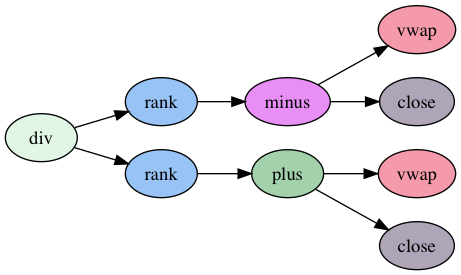

In [29]:
Image('alpha'+str(idx)+'.png')

In [30]:
e.imports

'from __future__ import division\nfrom zipline.pipeline.data import USEquityPricing as USEP\nfrom scipy.stats import rankdata\nfrom zipline.pipeline.factors import CustomFactor\nimport numpy as np\nimport bottleneck as bn\nimport pandas as pd\n'

In [31]:
expr_factor = (
    ExpressionAlpha('rank(log(close/delay(close, 5)))').
    make_pipeline_factor().
    pipeline_factor(mask=universe)
)

In [32]:
p = Pipeline(screen=universe)

mr_fac = -Returns(window_length=5, mask=universe).demean(groupby=Industry()).rank()
mr_fac = -Returns(window_length=5, mask=universe).rank()
mr_fac = -Returns(window_length=5)

#p.add(mr_fac, 'Control')
#p.add(USEP.close.latest, 'Control_close')
p.add(e.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha")
#p.add(f.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha1")
#p.add(g.make_pipeline_factor().pipeline_factor(mask=universe), "Expression Alpha2")

#p.show_graph()

In [33]:
start_date = '2014-01-02'
end_date = '2018-01-02'

df = run_pipeline(p, start_date, end_date)

In [34]:
df

Expression Alpha
2014-01-02 00:00:00+00:00 Equity(0 [A])                1.202970
                          Equity(2 [AAL])              0.386838
                          Equity(3 [AAMC])             1.000000
                          Equity(4 [AAN])              1.118984
                          Equity(7 [AAP])              0.103301
                          Equity(8 [AAPL])             0.002010
                          Equity(9 [AAT])              2.342398
                          Equity(10 [AAWW])            0.705441
                          Equity(11 [ABAX])            1.602700
                          Equity(12 [ABBV])            0.810953
                          Equity(13 [ABC])             0.967101
                          Equity(15 [ABCO])            0.155365
                          Equity(16 [ABFS])            1.180682
                          Equity(17 [ABG])             0.607380
                          Equity(18 [ABM])             2.453793
                          Equity(19 [ABMD])            2.883408
                          Equity(20 [ABT])             1.394212
                          Equity(21 [ACAD])            1.415858
                          Equity(22 [ACAS])            2.269231
                          Equity(23 [ACAT])            0.447126
                          Equity(24 [ACC])             2.274580
                          Equity(26 [ACCO])           10.260274
                          Equity(27 [ACE])             0.242441
                          Equity(28 [ACET])            0.628247
                          Equity(30 [ACGL])            0.113091
                          Equity(31 [ACHC])            0.598847
                          Equity(32 [ACHN])           75.266667
                          Equity(33 [ACI])            32.676471
                          Equity(34 [ACIW])            0.410540
                          Equity(36 [ACM])             1.536618
...                                                         ...
2018-01-02 00:00:00+00:00 Equity(3149 [XEL])           0.376852
                          Equity(3150 [XL])            1.088344
                          Equity(3151 [XLNX])          1.261056
                          Equity(3152 [XLRN])          1.766940
                          Equity(3154 [XNCR])          2.980695
                          Equity(3156 [XOM])           0.746154
                          Equity(3157 [XOMA])          1.337364
                          Equity(3158 [XON])           0.757143
                          Equity(3162 [XPO])           0.024000
                          Equity(3163 [XRAY])          1.017379
                          Equity(3165 [XRX])           1.230321
                          Equity(3167 [XXII])         26.433333
                          Equity(3168 [XYL])           0.676096
                          Equity(3169 [Y])             0.202219
                          Equity(3171 [YELP])          1.015641
                          Equity(3174 [YRCW])          2.924188
                          Equity(3175 [YUM])           1.100000
                          Equity(3177 [Z])             1.546709
                          Equity(3178 [ZAGG])          4.238554
                          Equity(3180 [ZBH])           0.993768
                          Equity(3181 [ZBRA])          0.779681
                          Equity(3182 [ZEN])           1.001269
                          Equity(3184 [ZEUS])          1.998004
                          Equity(3185 [ZGNX])          2.087889
                          Equity(3188 [ZION])          1.158355
                          Equity(3189 [ZIOP])          3.000000
                          Equity(3194 [ZNGA])          3.851852
                          Equity(3195 [ZOES])          3.459155
                          Equity(3197 [ZTS])           0.940934
                          Equity(3198 [ZUMZ])          2.605870

[2016000 rows x 1 columns]

In [35]:
1/2

0.5

In [36]:
df.tail()

Expression Alpha
2018-01-02 00:00:00+00:00 Equity(3189 [ZIOP])          3.000000
                          Equity(3194 [ZNGA])          3.851852
                          Equity(3195 [ZOES])          3.459155
                          Equity(3197 [ZTS])           0.940934
                          Equity(3198 [ZUMZ])          2.605870

Formatting factor data for: Expression Alpha
Dropped 0.7% entries from factor data: 0.6% in forward returns computation and 0.1% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!
Time to get arrange factor data: 20.60 secs
Time to generate long/short returns: 1.02 secs


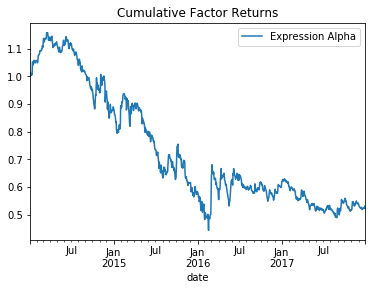

In [37]:
make_factor_plot(df, start_date, end_date);

In [38]:
e = ExpressionAlpha('rank(log(close/delay(opens, 5)))').parse().transform().generate_pipeline_code()

In [39]:
print(e.pipeline_code)

class ExprAlpha_1(CustomFactor):
    inputs = [USEP.close, USEP.open]
    window_length = 7

    def compute(self, today, assets, out, close, opens):
        v0 = np.roll(opens, 5, axis=0)
        v1 = close / v0
        v2 = np.log(v1)
        v3 = np.apply_along_axis(rankdata, 1, v2, method="ordinal")
        v4 = np.divide(v3.astype(float), np.sum(
            ~np.isnan(v3), axis=1).reshape(v3.shape[0], 1))
        out[:] = v4[-1]



In [40]:
#M,T,W,Th,F
# delay(5) --> prior friday
# returns(window=6)

In [41]:
b

NameError: name 'b' is not defined

In [86]:
def column_corr((a, b), window=-1):
    if window==-1:
        window = a.shape[0]
    out = np.zeros(shape = (1, a.shape[1]))
    for i in xrange(a.shape[1]-1):
        out[i] = pearsonr(a[-window:, i], b[-window:, i])[0]
    return out
        

In [20]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
np.random.seed(10)
a = np.random.random(30).reshape(10,3)
b = np.random.random(30).reshape(10,3)

In [21]:
a[1,1]

0.49850701230259042

In [22]:
a_1 = pd.DataFrame(a)
b_1 = pd.DataFrame(b)



In [15]:
def roll_corr((a, b), window):
    out = np.ones_like(a)*np.nan
    for i in xrange(window-1, a.shape[0]):   # 2- 10
        #print "%d --> %d" % ((i-(window-1)), i)
        for j in xrange(a.shape[1]):
            out[i, j] = pearsonr(
                a[(i-(window-1)):(i), j], b[(i-(window-1)):(i), j]
            )[0]
    return out

In [36]:
a

array([[ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362],
       [ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895]])

In [37]:
np.roll(a, 2, axis=0)

array([[ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895],
       [ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362]])

In [16]:
%%timeit
out = roll_corr((a,b), window=5)

1000 loops, best of 3: 645 µs per loop


In [23]:
%%timeit
out = pd.rolling_corr(arg1=a_1, arg2=b_1, window=5)

/anaconda3/envs/py27_clean/lib/python2.7/site-packages/ipykernel_launcher.py:257: FutureWarning: pd.rolling_corr is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=5).corr(other=<DataFrame>)


100 loops, best of 3: 10.1 ms per loop


In [12]:
out[-1]

NameError: name 'out' is not defined

In [5]:
#from __future__ import division
v0 = (np.arange(5)+1.)/np.sum(np.arange(5)+1.)

out = a_1.rolling(5).apply(lambda x: (x*v0).sum()).values

In [6]:
v0

array([ 0.06666667,  0.13333333,  0.2       ,  0.26666667,  0.33333333])

In [27]:
out[-1, :]

array([ 0.48050722,  0.55059807,  0.59170856])

In [18]:
from numba import jit

In [19]:
@jit
def roll_corr2((a, b), window):
    out = np.ones_like(a)*np.nan
    for i in xrange(window-1, a.shape[0]):   # 2- 10
        #print "%d --> %d" % ((i-(window-1)), i)
        for j in xrange(a.shape[1]):
            out[i, j] = pearsonr(
                a[(i-(window-1)):(i), j], b[(i-(window-1)):(i), j]
            )[0]
    return out

ValueError: '.0' is not a valid parameter name

In [207]:
def scale(x):
    return (x - np.nanmean(x))/np.nansum(np.abs(x - np.nanmean(x)))

In [211]:
np.apply_along_axis(lambda x: (x - np.nanmean(x))/np.nansum(np.abs(x - np.nanmean(x))), 1, a)

array([[ 0.32572934, -0.5       ,  0.17427066],
       [ 0.4853247 ,  0.0146753 , -0.5       ],
       [-0.23118186,  0.5       , -0.26881814],
       [-0.5       ,  0.11250682,  0.38749318],
       [-0.5       ,  0.07890222,  0.42109778],
       [ 0.14084777,  0.35915223, -0.5       ],
       [ 0.5       , -0.02694105, -0.47305895],
       [-0.45819778, -0.04180222,  0.5       ],
       [-0.23369585, -0.26630415,  0.5       ],
       [-0.5       ,  0.41441077,  0.08558923]])

array([[ 0.77132064,  0.02075195,  0.63364823],
       [ 0.74880388,  0.49850701,  0.22479665],
       [ 0.19806286,  0.76053071,  0.16911084],
       [ 0.08833981,  0.68535982,  0.95339335],
       [ 0.00394827,  0.51219226,  0.81262096],
       [ 0.61252607,  0.72175532,  0.29187607],
       [ 0.91777412,  0.71457578,  0.54254437],
       [ 0.14217005,  0.37334076,  0.67413362],
       [ 0.44183317,  0.43401399,  0.61776698],
       [ 0.51313824,  0.65039718,  0.60103895]])

In [33]:
from __future__ import division

np.sum()

1.0

55

In [65]:
import bottleneck as bn
import numpy as np
import pandas as pd
from scipy.stats import pearsonr, rankdata
np.random.seed(2)
a = np.random.random(60).reshape(20,3)    # days x stocks
b = np.random.randint(2, 5, size=(1,3))   # Industry cat vars as integers

In [22]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [25]:
b.max()+2

6

In [26]:
ohe = np.zeros((b.size, b.max()+2))
ohe[np.arange(b.size),b+1] = 1

In [27]:
ohe.T

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  0.],
       [ 1.,  0.,  1.]])

In [38]:
ind_mean = np.nan_to_num(a.dot(ohe)/ohe.sum(axis=0))

In [39]:
ind_mean

array([[ 0.        ,  0.        ,  0.        ,  0.02592623,  0.        ,
         0.49282869],
       [ 0.        ,  0.        ,  0.        ,  0.4203678 ,  0.        ,
         0.38282861],
       [ 0.        ,  0.        ,  0.        ,  0.61927097,  0.        ,
         0.25215165],
       [ 0.        ,  0.        ,  0.        ,  0.62113383,  0.        ,
         0.39798468],
       [ 0.        ,  0.        ,  0.        ,  0.51357812,  0.        ,
         0.15950991],
       [ 0.        ,  0.        ,  0.        ,  0.85397529,  0.        ,
         0.63978599],
       [ 0.        ,  0.        ,  0.        ,  0.07964548,  0.        ,
         0.67590379],
       [ 0.        ,  0.        ,  0.        ,  0.42812233,  0.        ,
         0.08090871],
       [ 0.        ,  0.        ,  0.        ,  0.59674531,  0.        ,
         0.17658599],
       [ 0.        ,  0.        ,  0.        ,  0.22030621,  0.        ,
         0.22838598]])

In [40]:
per_stock_ind_mean = ind_mean.dot(ohe.T)

In [41]:
per_stock_ind_mean # per stock ind_mean by day!

array([[ 0.49282869,  0.02592623,  0.49282869],
       [ 0.38282861,  0.4203678 ,  0.38282861],
       [ 0.25215165,  0.61927097,  0.25215165],
       [ 0.39798468,  0.62113383,  0.39798468],
       [ 0.15950991,  0.51357812,  0.15950991],
       [ 0.63978599,  0.85397529,  0.63978599],
       [ 0.67590379,  0.07964548,  0.67590379],
       [ 0.08090871,  0.42812233,  0.08090871],
       [ 0.17658599,  0.59674531,  0.17658599],
       [ 0.22838598,  0.22030621,  0.22838598]])

In [42]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [43]:
a - per_stock_ind_mean

array([[-0.05683379,  0.        ,  0.05683379],
       [ 0.05249379,  0.        , -0.05249379],
       [-0.04750302,  0.        ,  0.04750302],
       [-0.13115741,  0.        ,  0.13115741],
       [-0.02492996,  0.        ,  0.02492996],
       [ 0.14554916,  0.        , -0.14554916],
       [ 0.1706577 ,  0.        , -0.1706577 ],
       [-0.01562221,  0.        ,  0.01562221],
       [-0.04942601,  0.        ,  0.04942601],
       [-0.1214403 ,  0.        ,  0.1214403 ]])

In [33]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [34]:
a.shape

(10, 3)

In [35]:
bn.nanargmin(a, axis=0)

array([7, 0, 7])

In [36]:
np.argmax(a, axis=0)

array([6, 5, 0])

In [28]:
np.max(a, axis=0)

array([ 0.84656149,  0.85397529,  0.54966248])

In [25]:
a

array([[ 0.4359949 ,  0.02592623,  0.54966248],
       [ 0.43532239,  0.4203678 ,  0.33033482],
       [ 0.20464863,  0.61927097,  0.29965467],
       [ 0.26682728,  0.62113383,  0.52914209],
       [ 0.13457995,  0.51357812,  0.18443987],
       [ 0.78533515,  0.85397529,  0.49423684],
       [ 0.84656149,  0.07964548,  0.50524609],
       [ 0.0652865 ,  0.42812233,  0.09653092],
       [ 0.12715997,  0.59674531,  0.226012  ],
       [ 0.10694568,  0.22030621,  0.34982629]])

In [43]:
eps = 7./3 - 4./3 -1

array([[ 0.48129143,  0.1       ,  0.5869822 ],
       [ 0.48066611,  0.46676099,  0.38304622],
       [ 0.26618026,  0.65170579,  0.3545191 ],
       [ 0.32399542,  0.65343793,  0.56790186],
       [ 0.20102876,  0.55343012,  0.24738968],
       [ 0.80611615,  0.86993936,  0.53544614],
       [ 0.86304583,  0.14994941,  0.5456828 ],
       [ 0.1365981 ,  0.47397132,  0.16564988],
       [ 0.1941295 ,  0.63076091,  0.28604442],
       [ 0.17533378,  0.28073904,  0.40116984],
       [ 0.51085291,  0.26347875,  0.67135832],
       [ 0.5250628 ,  0.54567409,  0.43563501],
       [ 0.81383583,  0.61519462,  0.22680221],
       [ 0.72746909,  0.97275531,  0.54081264],
       [ 0.90298972,  0.39353354,  0.60323704],
       [ 0.47343541,  0.48199099,  0.79795605],
       [ 0.57391046,  0.96270499,  0.58191064],
       [ 0.15222696,  0.41652691,  0.86703386],
       [ 0.45365721,  0.10118658,  0.30572435],
       [ 0.13832559,  1.        ,  0.97836143]])

In [70]:
z = (bn.move_rank(a, window=10, axis=0))
np.interp(z, (z.min(), z.max()), (0.1, +1))

array([[ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan],
       [ nan,  nan,  nan]])

In [8]:
np.apply_along_axis(rankdata, axis=1, arr=a)

array([[ 2.,  1.,  3.],
       [ 3.,  2.,  1.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 2.,  3.,  1.],
       [ 3.,  1.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  2.,  3.]])

In [11]:
ranks = np.apply_along_axis(rankdata, axis=1, arr=a)

In [24]:
counts = np.sum(~np.isnan(ranks), axis=1).reshape(10,1)

In [25]:
ranks

array([[ 2.,  1.,  3.],
       [ 3.,  2.,  1.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 2.,  3.,  1.],
       [ 3.,  1.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  3.,  2.],
       [ 1.,  2.,  3.]])

In [26]:
np.divide(ranks, counts)

array([[ 0.66666667,  0.33333333,  1.        ],
       [ 1.        ,  0.66666667,  0.33333333],
       [ 0.33333333,  1.        ,  0.66666667],
       [ 0.33333333,  1.        ,  0.66666667],
       [ 0.33333333,  1.        ,  0.66666667],
       [ 0.66666667,  1.        ,  0.33333333],
       [ 1.        ,  0.33333333,  0.66666667],
       [ 0.33333333,  1.        ,  0.66666667],
       [ 0.33333333,  1.        ,  0.66666667],
       [ 0.33333333,  0.66666667,  1.        ]])